# Heart Failure Prediction

Cardiovascular diseases are the number 1 cause of death globally, being responsible of an estimated 17.9 million deaths per year (31% deaths worldwide).

Early detection can be key to prevent the evolution of the disease and death, thus machine learning approaches have shown strong performance, finding and detecting patterns in large datasets, allowing for the prediction of cardiovascular diseases.

In this project several machine learning approaches will be tested to classify patients into an outcome variable (death_event). The machine learning algorithms to be tested are:
- K-nearest neighbour
- Logistic regression
- Decision trees
- Random forest
- Support vector machine

Let's dig into this project!

### Import packages

In [138]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Load the data and check for missing values

Firstly, the data will be imported as a pandas dataframe, as it provides an intuitive and efficient way to manipulate and work with structured data.

The dataset contains several features:
- age
- anaemia → decrease of red blood cells or hemoglobin (boolean: 0 (no) or 1 (yes))
- creatinine_phosphokinase → Level of the CPK enzyme in the blood (mcg/L)
- diabetes → if the patient has diabetes (boolean: 0 (no) or 1 (yes))
- ejection_fraction → Percentage of blood leaving the heart at each contraction (%)
- high_blood_pressure → if the patient has hypertension (boolean: 0 (no) or 1 (yes))
- platelets → platelets in the blood (kiloplateletes/mL)
- serum_creatinine → level of serum creatinine in the blood (mg/dL)
- serum_sodium → level of serum sodium in the blood (mEq/L)
- sex → gender of the patient (boolean: 0 (woman) or 1 (man))
- smoking → if the patient smokes (boolean: 0 (no) or 1 (yes))
- time → follow-up period (days)

With a target column:
- DEATH_EVENT → if the patient died during the follow-up period (boolean: 0 (no) or 1 (yes))

In [139]:
raw_data = pd.read_csv("heart_failure_clinical_records_dataset.csv")
print("First 5 records:")
raw_data.head()

First 5 records:


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Once the data is imported correctly, let's have a general look at it to see what we are working with. For this, 2 pandas dataframe methods will be used: df.describe() and df.info().

In [140]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


df.info() has provided a summary of the number of entries for each feature or column and the designated data type. However, it might be beneficial to have a deeper look into the data, to see the actual entries, to discern between boolean variables and integer variables. That's where the df.describe() method comes in handy:

In [141]:
raw_data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Looking at the "count" row, there is no missing values for any of the columns. Let's verify that:

In [142]:
print("Number of empty slots per column:")
print(raw_data.isnull().sum(axis = 0))
print("")
print("Number of N/A:")
print(raw_data.isna().sum(axis = 0))

Number of empty slots per column:
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Number of N/A:
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


Once verified that:
1. The data type corresponding to each feature is assigned properly.
2. There is no missing data.

We can proceed to the exploratory data analysis.

### Exploratory data analysis

One of the most common assumptions in statistics and data science is that the varible to work with follows a normal distribution. To check this, let's plot histograms for all non-categorical variables: age, creatinine_phosphokinase, ejection_fraction, platelets, serum_creatinine, serum_sodium, and time.

Firstly, let's create a copy of the data, so the original dataset stays unchanged.

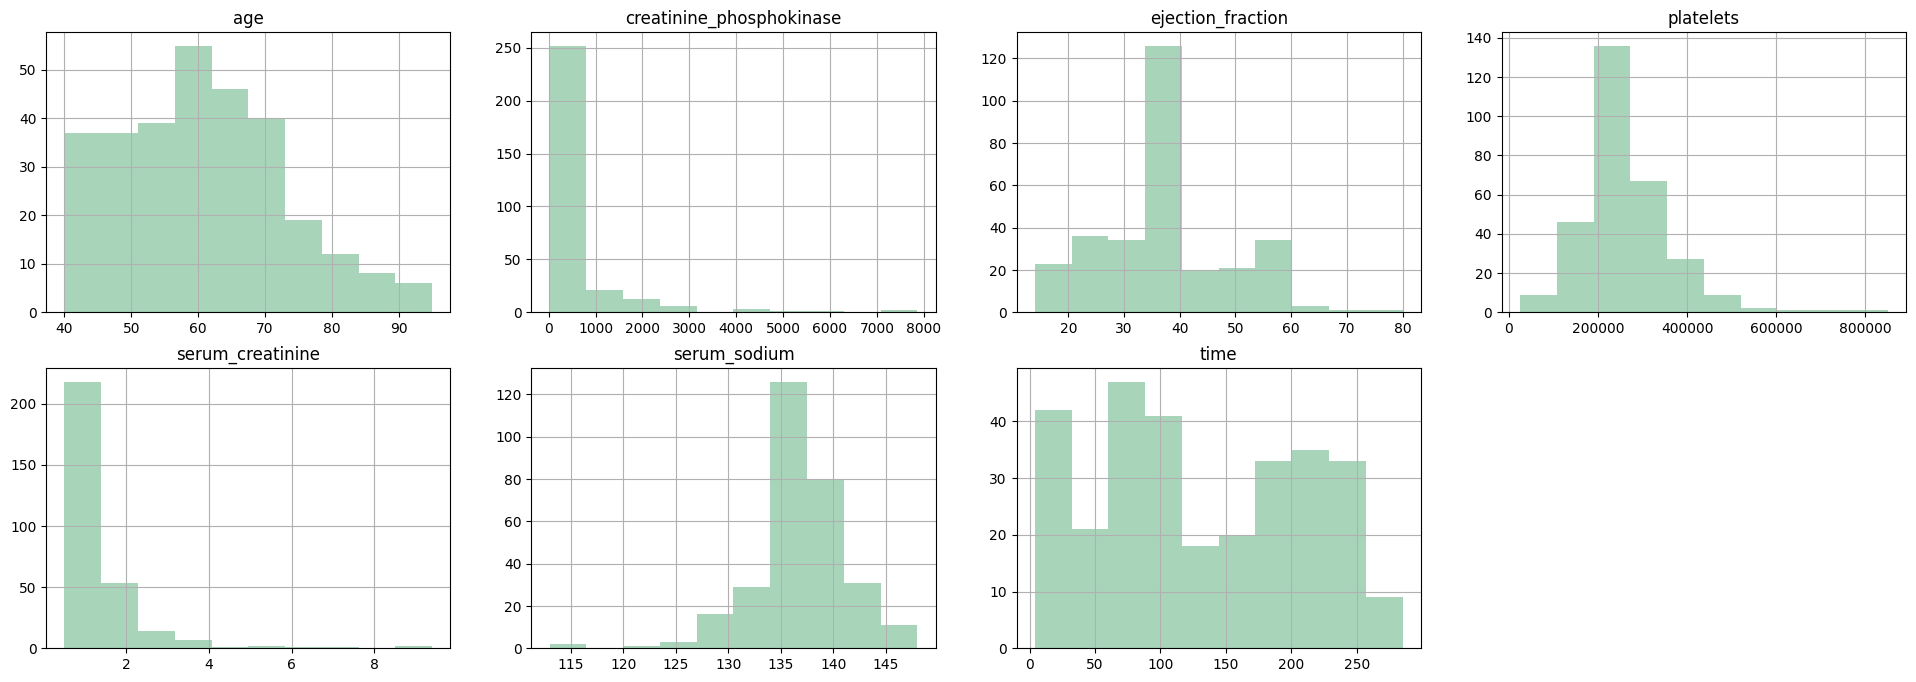

In [143]:
# Copy raw_data
data = raw_data.copy()

# Set up plot layout configuration
fig, axes = plt.subplots(2, 4, figsize=(24, 8))
axes = axes.flatten()

# Define continuous columns and plot histograms
continuous_colums = ["age", "creatinine_phosphokinase", "ejection_fraction", "platelets", "serum_creatinine", "serum_sodium", "time"]
for i, col in enumerate(continuous_colums):
    ax = axes[i]
    data[col].hist(ax=ax, color = '#A8D5BA')
    ax.set_title(col)

# Delete extra subplot
if len(continuous_colums) < len(axes):
    for j in range(len(continuous_colums), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout
plt.show()

As shown in the histograms above, many data variables show a skewed distribution. One approach to correct for this is to apply a logistic function to the data.

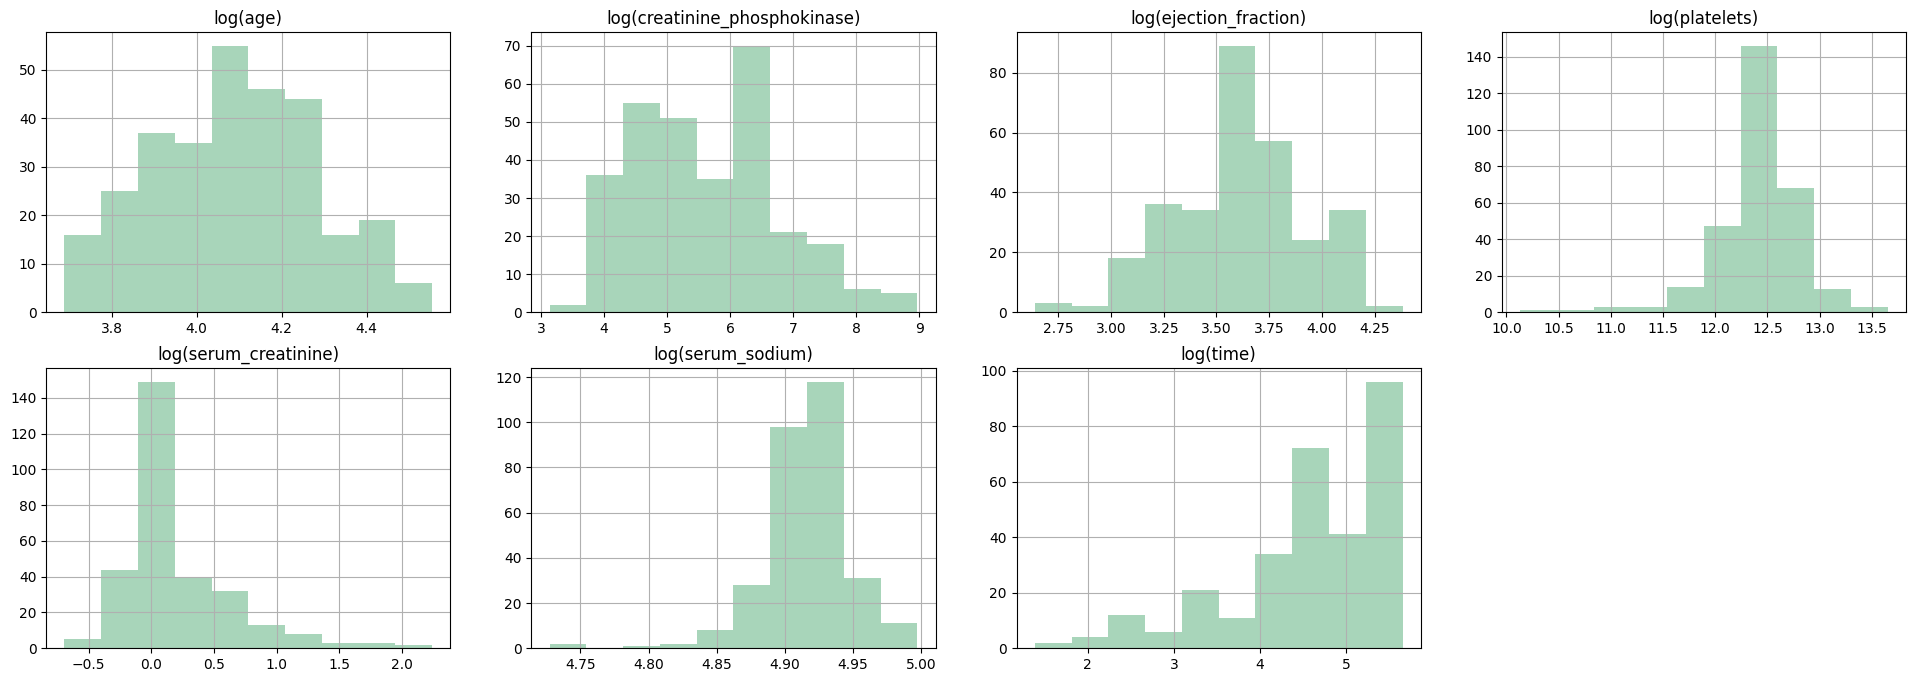

In [144]:
# Set up plot layout configuration
fig, axes = plt.subplots(2, 4, figsize=(24, 8))
axes = axes.flatten()

# Apply logistic transformation and plot histograms
for i, col in enumerate(continuous_colums):
    ax = axes[i]
    np.log(data[col]).hist(ax=ax, color = '#A8D5BA')
    ax.set_title(f'log({col})')

# Delete extra subplot
if len(continuous_colums) < len(axes):
    for j in range(len(continuous_colums), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout
plt.show()

After applying the logistic transformation, the skew in the features has been reduced, with the exception of the 'time' variable. Therefore, the 'time' variable will not transformed. 

In [145]:
cont_cols_no_time = continuous_colums[:-1]
print(cont_cols_no_time)
for col in cont_cols_no_time:
    data[col] = np.log(data[col].astype(float))

data.head()

['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,4.317488,0,6.366470,0,2.995732,1,12.487485,0.641854,4.867534,1,0,4,1
1,4.007333,0,8.969669,0,3.637586,0,12.481270,0.095310,4.912655,1,0,6,1
2,4.174387,0,4.983607,0,2.995732,0,11.995352,0.262364,4.859812,1,1,7,1
3,3.912023,1,4.709530,0,2.995732,0,12.254863,0.641854,4.919981,1,0,7,1
4,4.174387,1,5.075174,1,2.995732,0,12.697715,0.993252,4.753590,0,0,8,1


Let's have a look at the target column, is the dataset balanced?

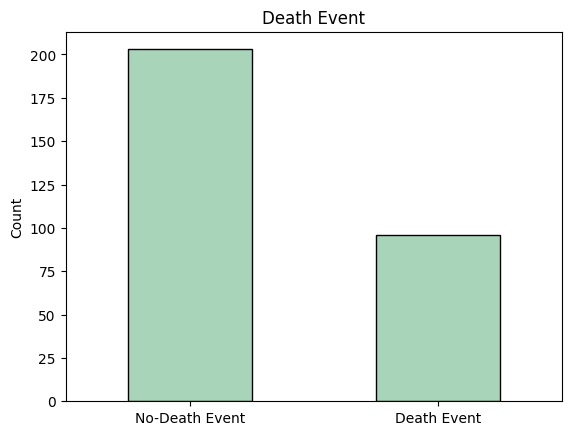

,Counts,Percentage
DEATH_EVENT,,
0,203,67.9%
1,96,32.1%


In [146]:
# Getting the count and percentage column by using target column
data.DEATH_EVENT.value_counts().sort_index().plot(kind='bar', 
                                                  color='#A8D5BA',
                                                  edgecolor='black')
plt.xlabel('')
plt.ylabel('Count')
plt.title('Death Event')
plt.xticks([0, 1], ['No-Death Event', 'Death Event'], rotation=0)
plt.show()

counts = data.DEATH_EVENT.value_counts()
percentage = data.DEATH_EVENT.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'Counts':counts,'Percentage': percentage})

As seen above, the dataset is not balanced, therefore class balancing strategies might be applied to the different classification algorithms, such as implementing a weighted loss function.

Let's split the dataset into training, validation, and test sets:

In [147]:
data_x = data.drop('DEATH_EVENT', axis = 1)
data_y = data.loc[:,'DEATH_EVENT']

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(data_x,data_y, test_size= 0.30, random_state = 1911)

print('Size of training set:', len(X_train))
print('Size of test set:', len(X_test))

Size of training set: 209
Size of test set: 90


Now, mean-normalize the data using the 'StandardScaler()' from scikit-learn.

In [148]:
scaler = StandardScaler()

# Fit the scaling into the training set
X_train_scaled = scaler.fit_transform(X_train)

# Apply the mean-normalization to test
X_test_scaled = scaler.transform(X_test)

With the data ready let's start modelling!

### K-Nearest Neighbor (KNN)

The first algorithm to be tested is KNN. This algorithm falls under the machine learning class of supervised learning. The goal of KNN is to predict the label of a new data point based on the majority, or average, of its k nearest neighbors.

While this algorithm is quite simple, it is very useful for several tasks, such as pattern recognition, or medical diagnosis.

Let's dive in!

In [149]:
# Basic fitting
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In the previous cell a basic KNN model has been trained, fitting the model to the training data, and leveraging the 5 closest neighbors for its predictions. Let's compute some evaluation metrics for this model by testing it againts the test data.

In [150]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = knn.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[56  8]
 [17  9]]
              precision    recall  f1-score   support

           0       0.77      0.88      0.82        64
           1       0.53      0.35      0.42        26

    accuracy                           0.72        90
   macro avg       0.65      0.61      0.62        90
weighted avg       0.70      0.72      0.70        90



The fitted model is far from performing perfectly. One observation is that it shows better performance with patients with not 'DEATH_EVENT', possibly due to the unbalanced nature of the dataset. 

Now let's finetune the hyperparameters. Note that because 'GridSearchCV()' already applies cross-validation inside the training set, there is not need to manually slice out a validation set for hyperparameter fine-tuning.

In [151]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': range(1, 21),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 = Manhattan, 2 = Euclidean
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_scaled, y_train)

print("Best params:", grid.best_params_)

best_knn = grid.best_estimator_
y_pred_best = best_knn.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))


Best params: {'n_neighbors': 4, 'p': 1, 'weights': 'distance'}
[[56  8]
 [16 10]]
              precision    recall  f1-score   support

           0       0.78      0.88      0.82        64
           1       0.56      0.38      0.45        26

    accuracy                           0.73        90
   macro avg       0.67      0.63      0.64        90
weighted avg       0.71      0.73      0.72        90



Unfortunately, even after applying hyperparameter fine-tuning, the performance of the KNN model stayed highly similar, only improving the classification of one single patient.

### Logistic Regression

This algorithm belongs to the supervised learning family and is particularly suited for classification problems.

The goal of Logistic Regression is to estimate the probability that a given input belongs to a particular class. It does this by applying the logistic (sigmoid) function to a linear combination of the input features, producing outputs between 0 and 1.

Despite its name, this algorithm is widely used for binary classification tasks, including areas like spam detection, credit scoring, and medical diagnosis.

Let’s dive in!